# Лабораторная работа 2 - Глобальная оптимизация и метаэврестические алгоритмы

В Pygmo запрогроммировать две своих тестовых функции и найти их оптимум 3 разными алгоритмами доступными в библиотеке и получить таблицу сравнения

In [ ]:
!pip install pygmo
import math
import pygmo as pg
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rc
from matplotlib import colors as cm
import pandas as pd

## Функция Химельблау

In [ ]:
def himmelblau(x: np.array, y: np.array) -> float:
  return (x**2 + y-11)**2 + (x+y**2-7)**2

class Himmelblau():
  @staticmethod
  def fitness(x):
        return [(x[0]**2 + x[1]-11)**2 + (x[0]+x[1]**2-7)**2]

  @staticmethod
  def get_bounds():
    return ([-5, -5], [5, 5])

  @staticmethod
  def gradient(self, x):
        return pg.estimate_gradient_h(lambda x: self.fitness(x), x)

  @staticmethod
  def get_glob_min():
      return np.array([3, 2, 0])

### Simple Genetic Algorithm


In [ ]:
Him_pop = 100
prob = pg.problem(Himmelblau())
pop = pg.population(prob, Him_pop)
print(prob)

Problem name: <class '__main__.Himmelblau'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0
	Gradient evaluations: 0

	Thread safety: none



In [ ]:
algo1 = pg.algorithm(pg.sga(500))
pop1 = algo1.evolve(pop)
print(pop1.get_x()[pop1.best_idx()])
print(pop1.champion_f)

[2.99921067 1.99897671]
[5.69906036e-05]


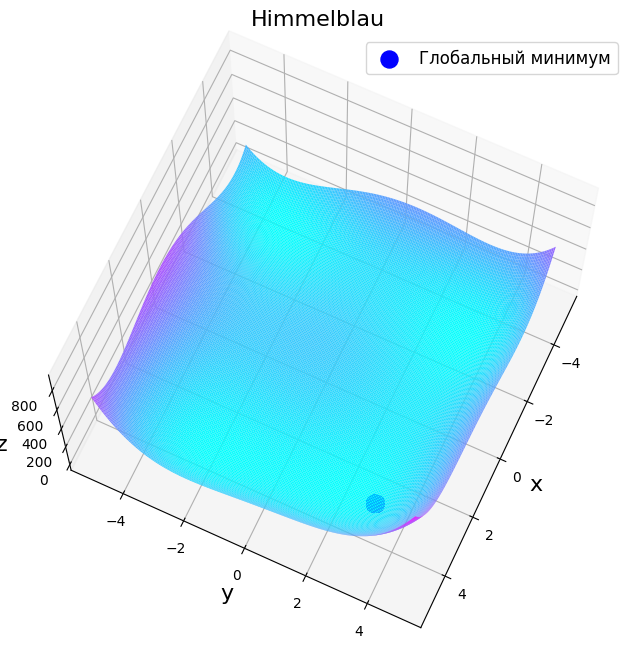

In [ ]:
def draw(f, pop, title, view=(70, 25)):
  fig = plt.figure(figsize=(12,8))
  ax = fig.add_subplot(projection = '3d')
  xDraw = np.linspace(-5, 5, num=200)
  yDraw = np.linspace(-5, 5, num=200)
  X, Y = np.meshgrid(xDraw, yDraw)
  Z = f(X, Y)
  ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='cool', linewidth=1, antialiased=True)
  ax.view_init(*view)
  ax.set_xlabel('x', fontsize=16)
  ax.set_ylabel('y', fontsize=16)
  ax.set_zlabel('z', fontsize=16)
  ax.set_title(title, fontsize=16)
  x = pop.get_x()[:,0]
  y = pop.get_x()[:,0]
  z = pop.get_f()[:,0]
  ax.scatter3D(x, y, z, s=150, c='b', label ='Глобальный минимум')
  ax.legend(fontsize=12)
  plt.show()

draw(himmelblau, pop1, 'Himmelblau')

In [ ]:
def draw_optimization_process(prob, algo, pop_size: int = 100, gen_max_count: int = 10):
  """
  prob - ф-ия
  algo - флгоритм оптимизации
  pop_size - размер популяций
  gen_max_count - кол-во поколений
  """

  pop = pg.population(prob, pop_size)

  fitness_list = []
  for i in range(gen_max_count):
      pop = algo.evolve(pop)
      fitness_list.append(pop.get_f()[pop.best_idx()])

  gens = np.linspace(0, gen_max_count, gen_max_count)
  fitness_list = np.array(fitness_list)

  fig = plt.figure(figsize = (10, 5))
  ax = plt.axes()

  ax.plot(gens, fitness_list, '-', marker = '.', label = "Результат чемпиона")
  ax.plot(gens, np.full(len(gens), prob.get_glob_min()[2]), '--', lw = 2, label = "Глобальный минимум")

  ax.set_title(type(prob).__name__)
  ax.set_xlabel("Generation")
  ax.set_ylabel("Fitness")
  ax.legend()
  plt.show()

  return (pop.get_x()[pop.best_idx()], pop.get_f()[pop.best_idx()])

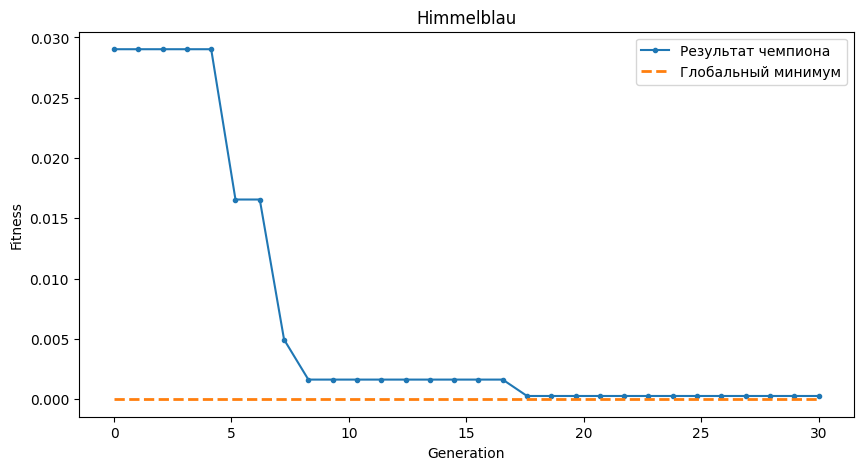

[2.9996578  2.00414778]
[0.00026897]


In [ ]:
gen = 10
i = 30
coord, val = draw_optimization_process(Himmelblau(), pg.algorithm(pg.sga(gen)), gen_max_count=i)
print(coord)
print(val)
res =[['Himmelblau', 'sga', Him_pop, gen, i, coord, val]]

### **Self-adaptive Differential Evolution**

In [ ]:
algo2 = pg.algorithm(pg.sade(gen=100))
pop2 = algo2.evolve(pop)
print(pop2.get_x()[pop2.best_idx()])
print(pop2.champion_f)

[ 3.58443002 -1.84812652]
[1.48490721e-10]


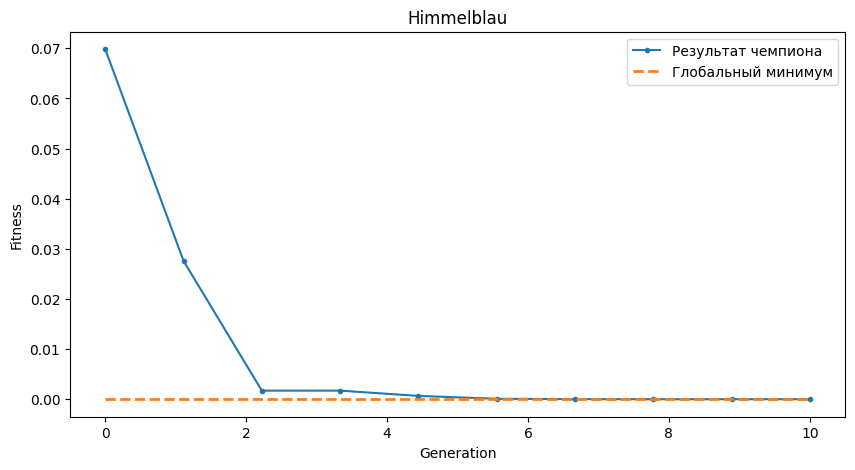

In [ ]:
gen = 10
i = 10
coord, val = draw_optimization_process(Himmelblau(), pg.algorithm(pg.sade(gen)),  gen_max_count=i)
res.append(['Himmelblau', 'sade', Him_pop, gen, i, coord, val])

### **Differential evolution**

In [ ]:
algo3 = pg.algorithm(pg.de(gen=100))
pop3 = algo3.evolve(pop)
print(pop3.champion_f)

[6.01593866e-10]


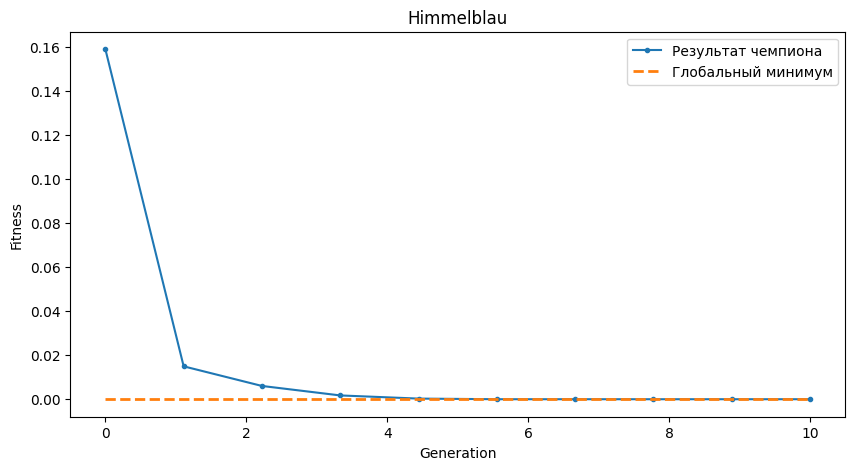

In [ ]:
gen = 10
i = 10
coord, val = draw_optimization_process(Himmelblau(), pg.algorithm(pg.de(gen)),  gen_max_count=i)
res.append(['Himmelblau', 'de', Him_pop, gen, i, coord, val])

## Функция Изома

In [ ]:
def izom(x: np.array, y: np.array) -> float:
  return -np.cos(x)*np.cos(y)*np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

class Izom:
  @staticmethod
  def fitness(x):
    return [-np.cos(x[0]) * np.cos(x[0]) * np.exp(-((x[0] - np.pi) ** 2 + (x[1] - np.pi) ** 2))]

  @staticmethod
  def get_bounds():
    return ([-10, -10], [10, 10])

  @staticmethod
  def get_glob_min():
    return np.array([np.pi, np.pi, -1])

### Simple Genetic Algorithm

In [ ]:
Izom_pop = 100
prob = pg.problem(Izom())
pop = pg.population(prob, Izom_pop)
print(prob)

Problem name: <class '__main__.Izom'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [ ]:
Izom_algo1 = pg.algorithm(pg.sga(gen=20))
Izom_pop1 = Izom_algo1.evolve(pop)
print(Izom_pop1.get_x()[pop.best_idx()])
print(Izom_pop1.champion_f)

[3.11037142 3.12917767]
[-0.99789839]


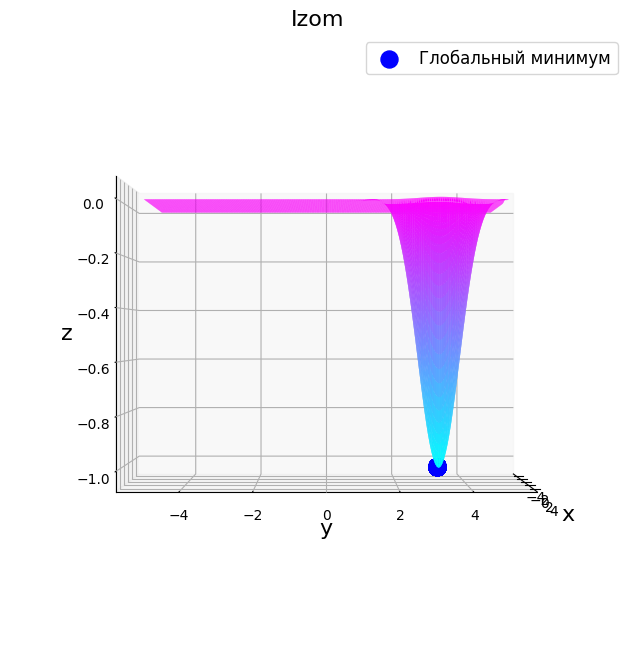

In [ ]:
draw(izom, Izom_pop1, 'Izom', (0, 0))

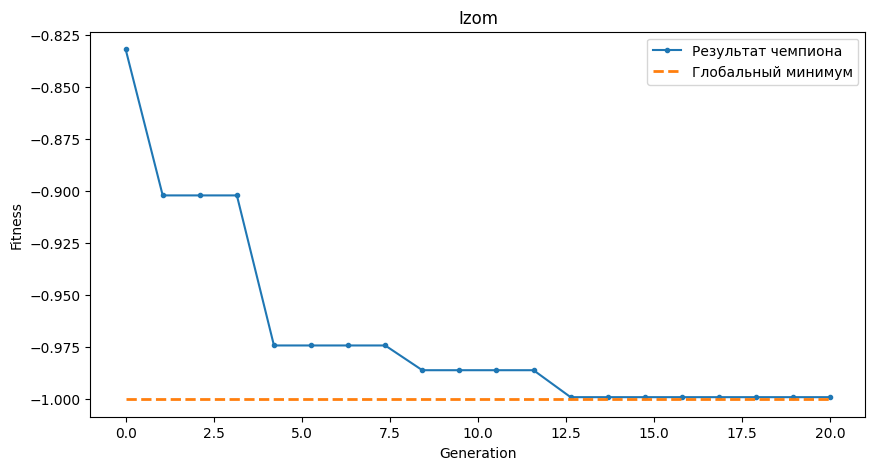

In [ ]:
gen = 10
i = 20
coord, val = draw_optimization_process(Izom(), pg.algorithm(pg.sga(gen)),  gen_max_count=i)
res.append(['Izom', 'sga', Izom_pop, gen, i, coord, val])

### **Self-adaptive Differential Evolution**

In [ ]:
Izom_algo2 = pg.algorithm(pg.sade(gen=20))
Izom_pop2 = Izom_algo2.evolve(pop)
print(Izom_pop2.champion_f)

[-0.99999334]


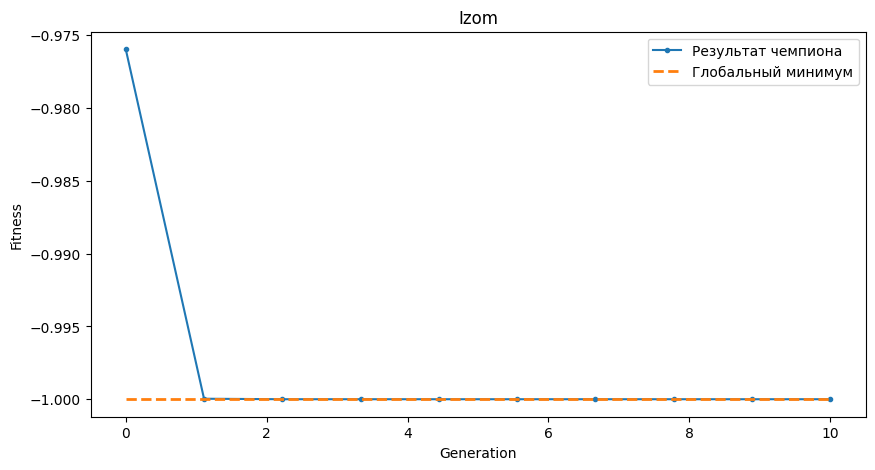

In [ ]:
gen = 10
i = 10
coord, val = draw_optimization_process(Izom(), pg.algorithm(pg.sade(gen)),  gen_max_count=i)
res.append(['Izom', 'sade', Izom_pop, gen, i, coord, val])

### **Differential evolution**

In [ ]:
Izom_algo3 = pg.algorithm(pg.de(gen=30))
Izom_pop3 = Izom_algo3.evolve(pop)
print(Izom_pop3.champion_f)

[-0.99999428]


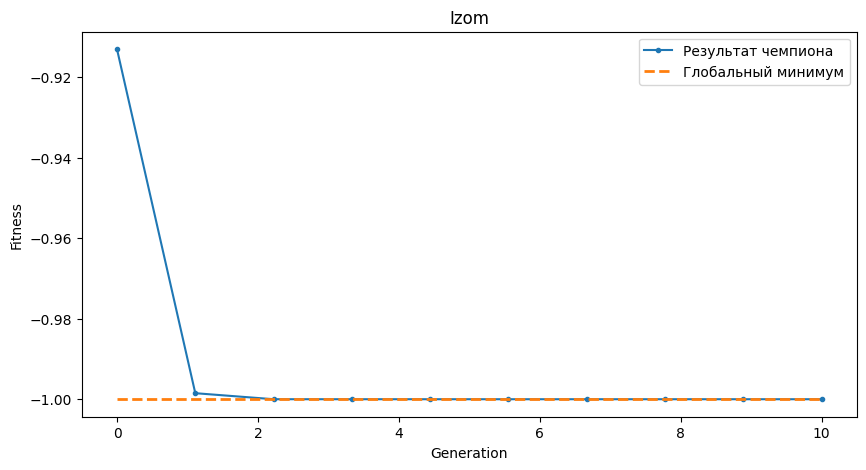

In [ ]:
gen = 10
i = 10
coord, val = draw_optimization_process(Izom(), pg.algorithm(pg.de(gen)),  gen_max_count=i)
res.append(['Izom', 'de', Izom_pop, gen, i, coord, val])

## Итоговая таблица

In [ ]:
df = pd.DataFrame(res, columns =['Problem', 'Algorithm', 'Pop', 'Gen', 'Iter', 'Minimum', 'Function value'])
df

,Problem,Algorithm,Pop,Gen,Iter,Minimum,Function value
0,Himmelblau,sga,100,10,30,"[2.999657804352879, 2.0041477800323926]",[0.00026897480386774483]
1,Himmelblau,sade,100,10,10,"[2.9999992304293155, 2.0000009078586736]",[2.1951141644877533e-11]
2,Himmelblau,de,100,10,10,"[3.5843983210016166, -1.848072332430518]",[7.897718219356773e-08]
3,Izom,sga,100,10,20,"[3.135741244413881, 3.111215398045224]",[-0.9990092353032719]
4,Izom,sade,100,10,10,"[3.141595956763664, 3.141603129669794]",[-0.9999999998684297]
5,Izom,de,100,10,10,"[3.141605093260939, 3.1415894278101666]",[-0.9999999996801036]
